 # Hidden Markov Models

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


In [20]:
dice_data = np.load("rolls.npy")
print(dice_data)
np.random.seed(13)

[[2]
 [0]
 [3]
 ...
 [1]
 [3]
 [5]]


In [31]:
def generate_probabilites():
    sampled_data = np.random.rand(5)
    sampled_data.sort()
    return np.diff(np.concatenate([np.zeros(1),sampled_data, np.ones(1)]))

def generate_emission_probabilities(m):
    emission_probabilities = []
    for i in range(m):
        emission_probabilities.append(generate_probabilites())
    np.save("emission.npy", emission_probabilities)
    return emission_probabilities
emission_probabilities = generate_emission_probabilities(100)

In [34]:
from hmmlearn import hmm
split_index = len(dice_data) // 2
train_data = dice_data[:split_index]
test_data = dice_data[split_index:]
emission_probabilities = np.load("emission.npy")
best_score = -np.inf
best_model = None
for emission_probability in emission_probabilities:
    model = hmm.CategoricalHMM(n_components=2,random_state=13,init_params='')
    model.startprob_ = np.array([1,0])
    model.transmat_ = np.array([[0.95,0.05],[0.05,0.95]])
    model.emissionprob_ = np.array([np.ones(6)/6 , emission_probability])
    model.fit(train_data.reshape(-1, 1))
    score = model.score(test_data.reshape(-1, 1))
    if score > best_score:
        best_score = score
        best_startprob = model.startprob_
        best_transmat = model.transmat_
        best_emissionprob = model.emissionprob_
        best_model = model
        print("Current best score: ", best_score)
        print("Current best emissionprob: ", best_emissionprob)
print('--------------------')
print('Best score: ', best_score)
print("Probabilities of Loaded die: ", best_emissionprob[1])
print("Probabilities of Fair die: ", best_emissionprob[0])
print('--------------------')

Current best score:  -43100.69821966992
Current best emissionprob:  [[0.14316588 0.14153777 0.15126704 0.14669091 0.15153931 0.26579909]
 [0.11141019 0.11610208 0.07192485 0.08293883 0.08011304 0.53751102]]
Current best score:  -43099.34696463492
Current best emissionprob:  [[0.15079863 0.14186078 0.14787664 0.14821223 0.1456792  0.26557252]
 [0.05509502 0.10850468 0.07671463 0.05928636 0.10261392 0.59778539]]
Current best score:  -43091.022632486296
Current best emissionprob:  [[0.15810889 0.15315677 0.15580148 0.14994249 0.15409091 0.22889946]
 [0.10243637 0.10953332 0.10751384 0.11222791 0.114858   0.45343056]]
Current best score:  -43081.25499722778
Current best emissionprob:  [[0.14970003 0.14832367 0.1515115  0.14890385 0.1540174  0.24754354]
 [0.09062965 0.0931729  0.085113   0.08537127 0.08284331 0.56286987]]
Current best score:  -43080.31812552579
Current best emissionprob:  [[0.15402192 0.14786569 0.15468857 0.15303719 0.15569084 0.23469579]
 [0.09665765 0.11039474 0.09622639

In [35]:
switches_array = best_model.predict(dice_data.reshape(-1, 1))
print('--------------------')
print("Most likely sequence of switching between the fair and loaded die: ", switches_array)
print("Turns at which the dice is switched: ", np.where(np.diff(switches_array) != 0)[0] + 1)
print('--------------------')

--------------------
Most likely sequence of switching between the fair and loaded die:  [0 0 0 ... 0 0 0]
Turns at which the dice is switched:  [  337   431   459   481   970  1064  1695  1705  2277  2287  2304  2324
  2374  2398  3012  3030  3494  3512  4050  4063  4314  4351  4546  4599
  5065  5117  5281  5294  5820  5848  6494  6533  6602  6613  6814  6851
  7734  7745  7901  7926  8165  8183  8661  8683  9632  9654 10734 10742
 10983 10995 11188 11196 11232 11255 11466 11477 12131 12160 12365 12402
 12422 12434 12489 12519 12661 12689 12714 12738 12935 12948 13000 13025
 13294 13332 13904 13919 13945 13976 14078 14132 14167 14179 14232 14254
 14585 14623 14678 14698 14764 14777 15450 15466 15741 15807 15854 15881
 16528 16548 16917 16945 17678 17696 18189 18197 18311 18320 18603 18670
 18825 18853 19591 19607 21268 21281 21299 21311 21362 21398 21509 21527
 22124 22141 22187 22200 22447 22465 22687 22793 23062 23089 23147 23174
 23419 23445 23570 23586 23672 23697 23803 23811 242

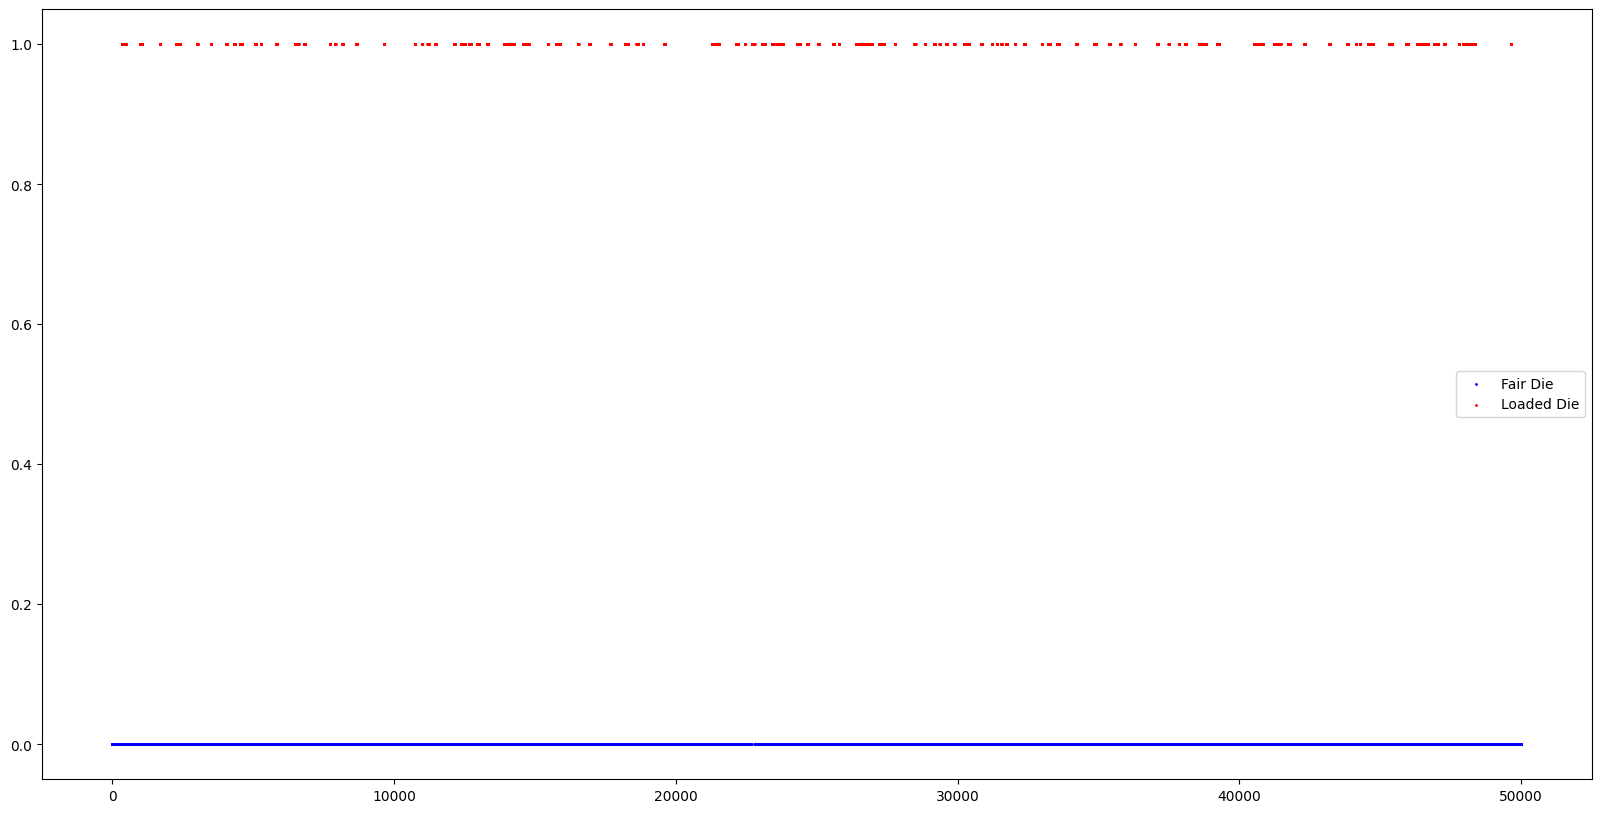

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(np.where(switches_array == 0)[0],np.zeros(len(np.where(switches_array == 0)[0])), s = 1 , c='b',label='Fair Die') 
plt.scatter(np.where(switches_array == 1)[0],np.ones(len(np.where(switches_array == 1)[0])), s= 1 , c='r',label='Loaded Die')
plt.legend()
plt.show()

In [43]:
print('--------------------')
print("Number of times the casino switched from fair to loaded die: ", len(np.where(np.diff(switches_array) == 1)[0])+len(np.where(np.diff(switches_array) == -1)[0]))
print('--------------------')
print('--------------------')
print("Probability of switching from fair to loaded die: ", best_transmat[0][1])
print("Probability of switching from loaded to fair die: ", best_transmat[1][0])
print('--------------------')

--------------------
Number of times the casino switched from fair to loaded die:  308
--------------------
--------------------
Probability of switching from fair to loaded die:  0.05282808076960333
Probability of switching from loaded to fair die:  0.1362671631707878
--------------------


In [44]:
print('--------------------')
print("Probabilities of Loaded die: ", best_emissionprob[1])
print('--------------------')

--------------------
Probabilities of Loaded die:  [0.09665765 0.11039474 0.09622639 0.09318361 0.09922554 0.50431206]
Probabilities of Fair die:  [0.15402192 0.14786569 0.15468857 0.15303719 0.15569084 0.23469579]
--------------------


In [49]:
runs_data = np.load("runs.npy")
# print(runs_data)
np.random.seed(13)
continuous_run_data = np.where(runs_data==6,5,runs_data)
HMM = hmm.CategoricalHMM(n_components=2,random_state=13,init_params='')
HMM.transmat_ = np.array([[0.7,0.3],[0.3,0.7]])
HMM.fit(continuous_run_data)

optimal_transition_probabilities = HMM.transmat_
optimal_emission_probabilities = HMM.emissionprob_
optimal_start_probabilities = HMM.startprob_

print('---------------')
print("Optimal Transition Probabilities",optimal_transition_probabilities)
print("Optimal Emission Probabilities",optimal_emission_probabilities)
print("Optimal start probabilities",optimal_start_probabilities)
print('---------------')

---------------
Optimal Transition Probabilities [[0.72822223 0.27177777]
 [0.42099112 0.57900888]]
Optimal Emission Probabilities [[0.10906364 0.09369237 0.1403522  0.0477004  0.39396409 0.2152273 ]
 [0.15044751 0.36567297 0.23376156 0.04880387 0.03662338 0.1646907 ]]
Optimal start probabilities [3.14092467e-06 9.99996859e-01]
---------------


In [50]:
states = HMM.predict(continuous_run_data)
first_ball_player = "Rohit Sharma" if states[0] == 0 else "Virat Kohli"
last_ball_player = "Rohit Sharma" if states[-1] == 0 else "Virat Kohli"

print(f"The player who played the first ball is: {first_ball_player}")
print(f"The player who played the last ball is: {last_ball_player}")

The player who played the first ball is: Virat Kohli
The player who played the last ball is: Rohit Sharma
